# App Popularity Prediciton (Classification)

## Importing necessary Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading the Data

In [44]:
folder_path='Data_Sets'
csv_file = 'googleplaystore.csv'
csv_path = os.path.join(folder_path,csv_file)

df = pd.read_csv(csv_path)

## Data Exploration and Initial Inspection

In [45]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [46]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [47]:
df.shape

(10841, 13)

In [48]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Checking and Removing the null data

In [49]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [50]:
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Data Type Conversion

In [51]:
df['Rating'] = df['Rating'].astype(float)  # Convert to float type

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(int)

In [52]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Remove Duplicates

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

## Normalization
### Scaling Rating between 0 and 1

In [55]:
df['Rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Rating'] = df['Rating'].round(4)

In [56]:
df.describe()

,Rating,Installs
count,10366.000000,1.036600e+04
mean,0.797060,1.414547e+07
std,0.138421,8.020579e+07
min,0.000000,0.000000e+00
25%,0.750000,1.000000e+03
50%,0.825000,1.000000e+05
75%,0.875000,1.000000e+06
max,1.000000,1.000000e+09


In [57]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Detecting and Removing the Outliers

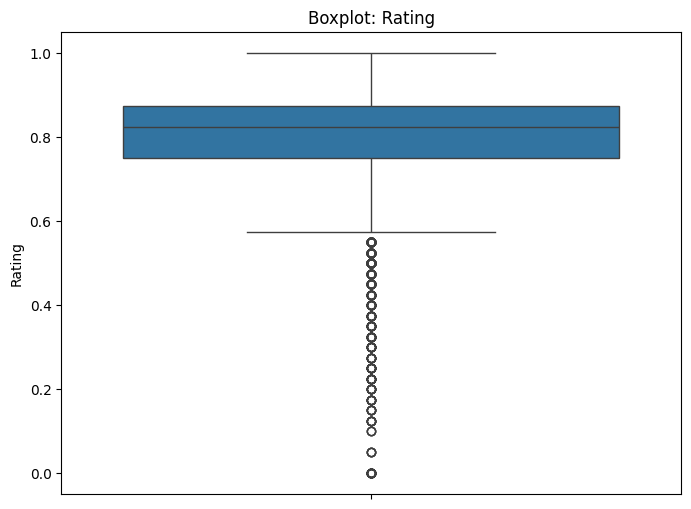

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Rating', data=df)
plt.title('Boxplot: Rating')
plt.show()

In [59]:
df = df[df['Rating'] <= 5]

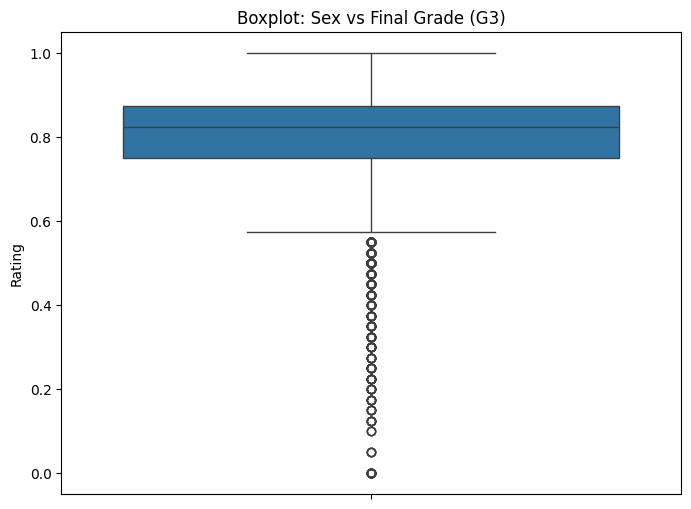

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Rating', data=df)
plt.title('Boxplot: Sex vs Final Grade (G3)')
plt.show()

## Feature Engineering 

In [61]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [62]:
print("\nCleaned Data:")
print(df.head())


Cleaned Data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   0.775   
1                                Coloring book moana  ART_AND_DESIGN   0.725   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   0.925   
3                              Sketch - Draw & Paint  ART_AND_DESIGN   0.875   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   0.825   

  Reviews  Size  Installs  Type  Price Content Rating  \
0     159   19M     10000  Free    0.0       Everyone   
1     967   14M    500000  Free    0.0       Everyone   
2   87510  8.7M   5000000  Free    0.0       Everyone   
3  215644   25M  50000000  Free    0.0           Teen   
4     967  2.8M    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Prete

## Drop Unnecessary Columns

In [63]:
df = df.drop(columns=['App','Genres','Last Updated','Current Ver','Android Ver'])
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,0.775,159,19M,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,0.725,967,14M,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,0.925,87510,8.7M,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,0.875,215644,25M,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,0.825,967,2.8M,100000,Free,0.0,Everyone


## Storing the Cleaned Data to a new CSV file

In [64]:
output_file = 'Data_Sets/cleaned_googleplaystore.csv'
df.to_csv(output_file, index=False)
print(f"Cleaned data has been saved to {output_file}")

Cleaned data has been saved to Data_Sets/cleaned_googleplaystore.csv


## Listing the Categorical and Numerical Columns

In [65]:
categorical_columns = df.select_dtypes(include=['category','object']).columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

## Visualizing the Data

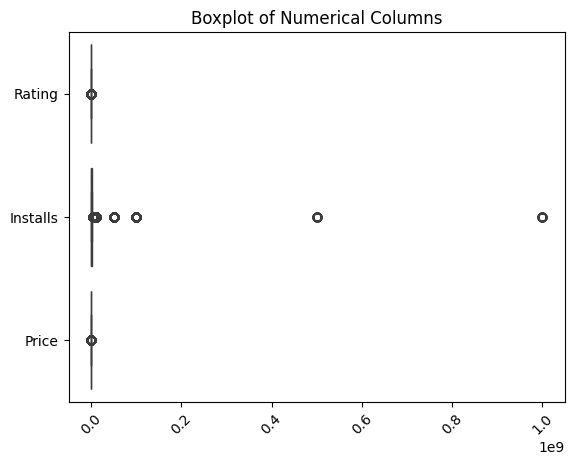

In [66]:
plt.Figure(figsize=(8, 6))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()

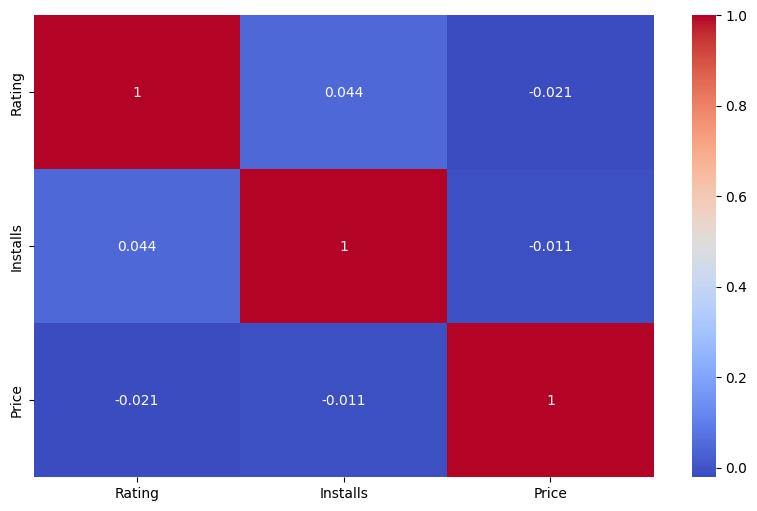

In [67]:
plt.figure(figsize=(10,6))
corr_mat = df[numerical_columns].corr()
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)
plt.show()

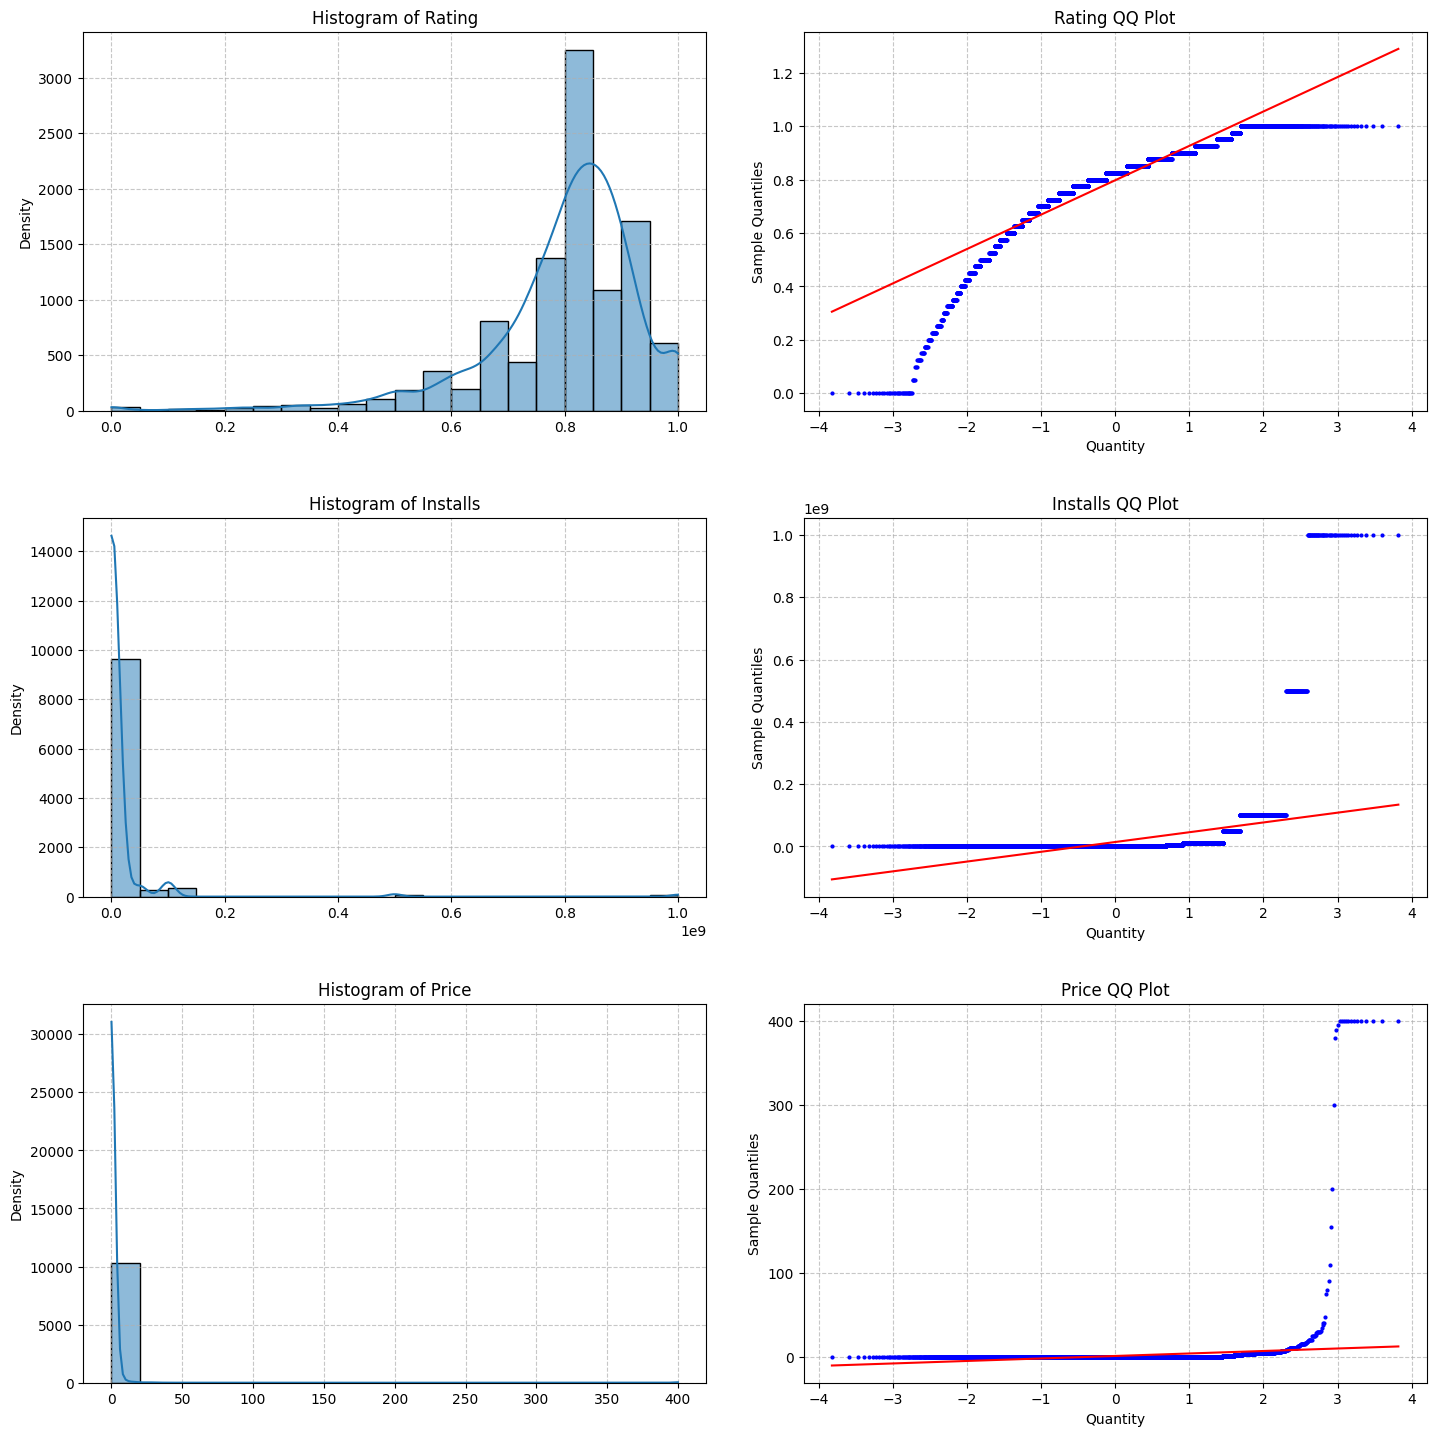

In [68]:
import scipy.stats as stats

# Create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(15, num_cols * 5))

# Plotting histograms and QQ plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Histogram with KDE
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)

    # Q-Q plot
    stats.probplot(df[col], dist="norm", plot=axes[i, 1], fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0)  # Set size of markers
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_xlabel('Quantity')
    axes[i, 1].set_ylabel('Sample Quantiles')
    axes[i, 1].set_title(f'{col} QQ Plot')

# Adjust layout after all subplots are created
plt.tight_layout(pad=3.0)
plt.show()

In [69]:
# Iterate  through each column
for column in df.columns:
    unique_values = df[column].unique()
    # print the column name and its unique values
    print(f'{column}: {unique_values}')
    print(unique_values)
    print()

Category: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

Rating: [0.775 0.725 0.925 0.875 0.825 0.85  0.7   0.8   

## Loading and Working with the Filtered Datasets and Analysis

In [70]:
df = pd.read_csv('Data_Sets/cleaned_googleplaystore.csv')
df.head(60)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,0.775,159,19M,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,0.725,967,14M,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,0.925,87510,8.7M,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,0.875,215644,25M,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,0.825,967,2.8M,100000,Free,0.0,Everyone
5,ART_AND_DESIGN,0.850,167,5.6M,50000,Free,0.0,Everyone
6,ART_AND_DESIGN,0.700,178,19M,50000,Free,0.0,Everyone
7,ART_AND_DESIGN,0.775,36815,29M,1000000,Free,0.0,Everyone
8,ART_AND_DESIGN,0.850,13791,33M,1000000,Free,0.0,Everyone
9,ART_AND_DESIGN,0.925,121,3.1M,10000,Free,0.0,Everyone


In [71]:
df.dropna()
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,0.775,159,19M,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,0.725,967,14M,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,0.925,87510,8.7M,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,0.875,215644,25M,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,0.825,967,2.8M,100000,Free,0.0,Everyone


In [72]:
df['Size'] = df['Size'].replace('Varies with device', None)
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3').astype(float)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,0.775,159,19000000.0,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,0.725,967,14000000.0,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,0.925,87510,8700000.0,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,0.875,215644,25000000.0,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,0.825,967,2800000.0,100000,Free,0.0,Everyone


In [73]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns #Gets the numerical Columns of the data
categorical_columns = df.select_dtypes(include=['object','category']).columns #Get the Categorical Columns of the data

In [74]:
numerical_cols

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')

In [87]:
categorical_columns

Index(['Category', 'Type', 'Content Rating'], dtype='object')

## Encode Categorical Columns

In [75]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Category', 'Type', 'Content Rating'], drop_first=True)

In [76]:
df.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.775,159,19000000.0,10000,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.725,967,14000000.0,500000,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.925,87510,8700000.0,5000000,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.875,215644,25000000.0,50000000,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.825,967,2800000.0,100000,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Create Target Column

In [77]:
df['Popular'] = df['Installs'].apply(lambda x: 1 if x > 1000000 else 0)

In [78]:
df.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Popular
0,0.775,159,19000000.0,10000,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
1,0.725,967,14000000.0,500000,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
2,0.925,87510,8700000.0,5000000,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
3,0.875,215644,25000000.0,50000000,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
4,0.825,967,2800000.0,100000,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0


In [79]:
df.isnull().sum()

Rating                             0
Reviews                            0
Size                            1526
Installs                           0
Price                              0
Category_AUTO_AND_VEHICLES         0
Category_BEAUTY                    0
Category_BOOKS_AND_REFERENCE       0
Category_BUSINESS                  0
Category_COMICS                    0
Category_COMMUNICATION             0
Category_DATING                    0
Category_EDUCATION                 0
Category_ENTERTAINMENT             0
Category_EVENTS                    0
Category_FAMILY                    0
Category_FINANCE                   0
Category_FOOD_AND_DRINK            0
Category_GAME                      0
Category_HEALTH_AND_FITNESS        0
Category_HOUSE_AND_HOME            0
Category_LIBRARIES_AND_DEMO        0
Category_LIFESTYLE                 0
Category_MAPS_AND_NAVIGATION       0
Category_MEDICAL                   0
Category_NEWS_AND_MAGAZINES        0
Category_PARENTING                 0
C

## Defining Features and Target

In [91]:
df['Size'].fillna(df['Size'].mode()[0], inplace=True)
df.isnull().sum()

Rating                          0
Reviews                         0
Size                            0
Installs                        0
Price                           0
Category_AUTO_AND_VEHICLES      0
Category_BEAUTY                 0
Category_BOOKS_AND_REFERENCE    0
Category_BUSINESS               0
Category_COMICS                 0
Category_COMMUNICATION          0
Category_DATING                 0
Category_EDUCATION              0
Category_ENTERTAINMENT          0
Category_EVENTS                 0
Category_FAMILY                 0
Category_FINANCE                0
Category_FOOD_AND_DRINK         0
Category_GAME                   0
Category_HEALTH_AND_FITNESS     0
Category_HOUSE_AND_HOME         0
Category_LIBRARIES_AND_DEMO     0
Category_LIFESTYLE              0
Category_MAPS_AND_NAVIGATION    0
Category_MEDICAL                0
Category_NEWS_AND_MAGAZINES     0
Category_PARENTING              0
Category_PERSONALIZATION        0
Category_PHOTOGRAPHY            0
Category_PRODU

In [92]:
X = df.drop(columns=['Installs', 'Popular'])
y = df['Popular']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
# Train a model
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

Training Accuracy: 0.95
Testing Accuracy: 0.92
Confusion Matrix:
[[1498   55]
 [ 114  407]]


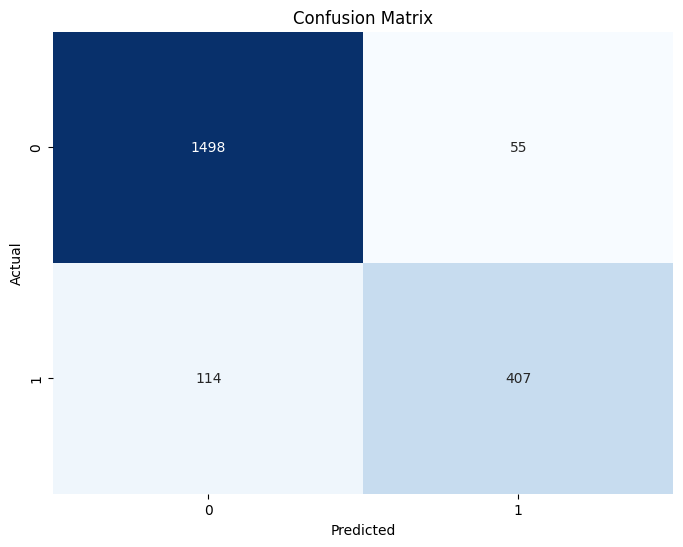

In [95]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
import joblib
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')
    
model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model,model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/knn_model.pkl


In [97]:
df.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Paid',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Conte